In [34]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pandas as pd
import numpy as np

import seaborn as sns

In [36]:
flex_to_output = 0.5

if (flex_to_output == 1.0):
    df = pd.read_csv('/Users/jonasb/repos/heat-pump-first-paper/diagram_nbs/data/flex0123_1_0.csv', sep=';')
else:
    df = pd.read_csv('/Users/jonasb/repos/heat-pump-first-paper/diagram_nbs/data/flex0123.csv', sep=';')

df = df.set_index('model')
df

nyc_off               nyc_on  \
model                                                         
LSTM (h=16, m=16)  1.059| 0.973| 0.981  0.991| 0.862| 0.652   
LSTM (h=32, m=96)  1.062| 0.970| 0.975  1.157| 0.700| 0.417   
GRU (h=16, m=16)   1.124| 0.979| 1.063  1.113| 0.795| 0.609   
GRU (h=16, m=96)   1.087| 0.969| 0.998  1.148| 0.827| 0.722   
LR (m=16)          1.162| 0.935| 0.975  1.530| 0.710| 0.817   
LR (m=32)          1.255| 0.879| 0.907  1.052| 0.958| 0.948   
SARIMAX            1.065| 1.000| 1.065  2.267| 0.000| 0.000   

                              nist_off              nist_on  \
model                                                         
LSTM (h=16, m=16)  0.000| 1.000| 0.000  0.017| 1.000| 0.017   
LSTM (h=32, m=96)  0.501| 0.874| 0.000  0.186| 0.954| 0.017   
GRU (h=16, m=16)   0.000| 1.000| 0.000  0.017| 1.000| 0.017   
GRU (h=16, m=96)   0.139| 0.965| 0.000  0.390| 0.903| 0.034   
LR (m=16)          0.014| 0.997| 0.000  0.102| 0.977| 0.017   
LR (m=32)          0.000| 1.000| 0.000  0.542| 0.862| 0.034   
SARIMAX            0.005| 1.000| 0.005  0.282| 0.924| 0.000   

                           neogrid_off           neogrid_on  
model                                                        
LSTM (h=16, m=16)  0.000| 1.000| 0.000  0.000| 1.000| 0.000  
LSTM (h=32, m=96)  0.219| 0.944| 0.000  0.000| 1.000| 0.000  
GRU (h=16, m=16)   0.069| 0.983| 0.000  0.000| 1.000| 0.000  
GRU (h=16, m=96)   0.043| 0.989| 0.000  0.000| 1.000| 0.000  
LR (m=16)          0.086| 0.978| 0.000  0.000| 1.000| 0.000  
LR (m=32)          0.524| 0.867| 0.000  0.000| 1.000| 0.000  
SARIMAX            0.023| 1.000| 0.023  0.000| 1.000| 0.000

In [37]:
def get_vals(str_val, take_index = 0):
    str_val_list = list(map(lambda v: float(v.strip()), str_val.split('|')))
    return str_val_list[take_index]

def extract_df_vals(df, val):
    df_copy = df.copy(deep=True)
    for col in df_copy.columns:
        if (col == "model"):
            continue
        df_copy[col] = df_copy[col].apply(lambda str_val: get_vals(str_val, take_index=val))
    return df_copy

mafe_df = extract_df_vals(df, 0)
maofe_df = extract_df_vals(df, 2)

In [38]:
mafe_df.head(1)

nyc_off  nyc_on  nist_off  nist_on  neogrid_off  neogrid_on
model                                                                         
LSTM (h=16, m=16)    1.059   0.991       0.0    0.017          0.0         0.0

In [39]:
maofe_df.head(1)

nyc_off  nyc_on  nist_off  nist_on  neogrid_off  neogrid_on
model                                                                         
LSTM (h=16, m=16)    0.981   0.652       0.0    0.017          0.0         0.0

In [40]:
maufe_df = mafe_df.subtract(maofe_df)
maufe_df.head(1)

nyc_off  nyc_on  nist_off  nist_on  neogrid_off  neogrid_on
model                                                                         
LSTM (h=16, m=16)    0.078   0.339       0.0      0.0          0.0         0.0

In [41]:
# import seaborn as sns
# sns.set()
# df.plot(
#     kind='bar',
#     figsize=(12,6),
#     stacked=True,
# )

In [42]:
transposed_maufe = maufe_df.transpose()
maufe_error_array = transposed_maufe.to_numpy()

maufe_error_array

array([[0.078, 0.087, 0.061, 0.089, 0.187, 0.348, 0.   ],
       [0.339, 0.74 , 0.504, 0.426, 0.713, 0.104, 2.267],
       [0.   , 0.501, 0.   , 0.139, 0.014, 0.   , 0.   ],
       [0.   , 0.169, 0.   , 0.356, 0.085, 0.508, 0.282],
       [0.   , 0.219, 0.069, 0.043, 0.086, 0.524, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

In [43]:
transposed_maofe = maofe_df.transpose()
maofe_error_array = transposed_maofe.to_numpy()

maofe_error_array

array([[0.981, 0.975, 1.063, 0.998, 0.975, 0.907, 1.065],
       [0.652, 0.417, 0.609, 0.722, 0.817, 0.948, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.005],
       [0.017, 0.017, 0.017, 0.034, 0.017, 0.034, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.023],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

In [44]:
sns.color_palette('Reds')

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

In [45]:
sns.color_palette('Blues')

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

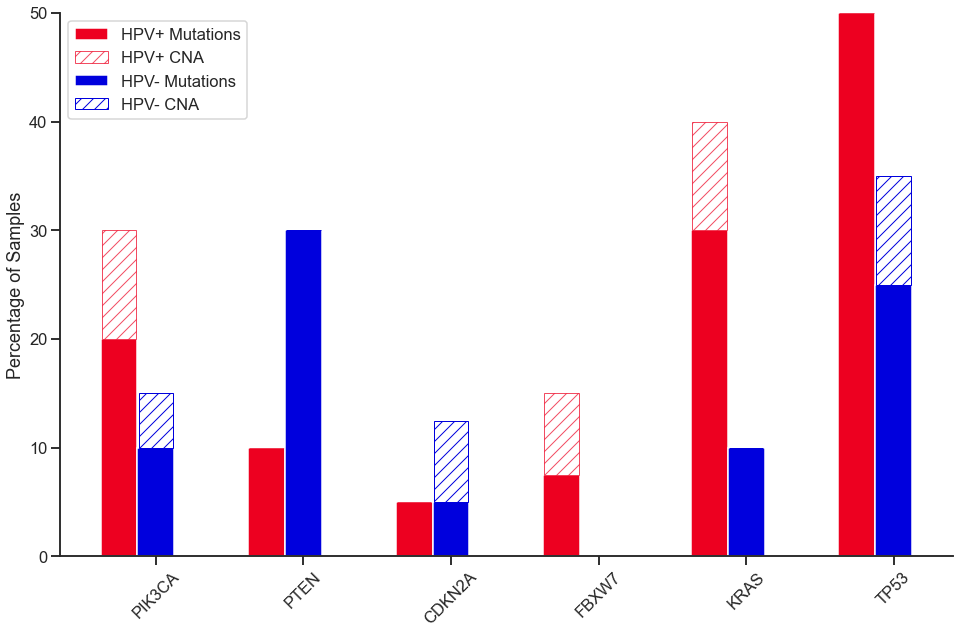

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# make up some fake data
pos_mut_pcts = np.array([20, 10, 5, 7.5, 30, 50])
pos_cna_pcts = np.array([10, 0, 0, 7.5, 10, 0])
pos_both_pcts = np.array([10, 0, 0, 0, 0, 0])
neg_mut_pcts = np.array([10, 30, 5, 0, 10, 25])
neg_cna_pcts = np.array([5, 0, 7.5, 0, 0, 10])
neg_both_pcts = np.array([0, 0, 0, 0, 0, 10])
genes = ['PIK3CA', 'PTEN', 'CDKN2A', 'FBXW7', 'KRAS', 'TP53']

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")

    plt.figure(figsize=(16,10))

    # plot details
    bar_width = 0.25
    epsilon = .015
    line_width = 1
    opacity = 0.7
    pos_bar_positions = np.arange(len(pos_mut_pcts))
    neg_bar_positions = pos_bar_positions + bar_width

    # KEY IDEA HERE IS TO USE BOTTOM=

    # make bar plots
    hpv_pos_mut_bar = plt.bar(pos_bar_positions, pos_mut_pcts, bar_width,
                              color='#ED0020',
                              label='HPV+ Mutations')
    hpv_pos_cna_bar = plt.bar(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
                              bottom=pos_mut_pcts,
                              alpha=opacity,
                              color='white',
                              edgecolor='#ED0020',
                              linewidth=line_width,
                              hatch='//',
                              label='HPV+ CNA')
    # hpv_pos_both_bar = plt.bar(pos_bar_positions, pos_both_pcts, bar_width-epsilon,
    #                            bottom=pos_cna_pcts+pos_mut_pcts,
    #                            alpha=opacity,
    #                            color='white',
    #                            edgecolor='#ED0020',
    #                            linewidth=line_width,
    #                            hatch='0',
    #                            label='HPV+ Both')
    hpv_neg_mut_bar = plt.bar(neg_bar_positions, neg_mut_pcts, bar_width,
                              color='#0000DD',
                              label='HPV- Mutations')
    hpv_neg_cna_bar = plt.bar(neg_bar_positions, neg_cna_pcts, bar_width-epsilon,
                              bottom=neg_mut_pcts,
                              color="white",
                              hatch='//',
                              edgecolor='#0000DD',
                              ecolor="#0000DD",
                              linewidth=line_width,
                              label='HPV- CNA')
    # hpv_neg_both_bar = plt.bar(neg_bar_positions, neg_both_pcts, bar_width-epsilon,
    #                            bottom=neg_cna_pcts+neg_mut_pcts,
    #                            color="white",
    #                            hatch='0',
    #                            edgecolor='#0000DD',
    #                            ecolor="#0000DD",
    #                            linewidth=line_width,
    #                            label='HPV- Both')
    plt.xticks(neg_bar_positions, genes, rotation=45)
    plt.ylabel('Percentage of Samples')
    plt.legend(loc='best')
    sns.despine()

LSTM (h=16, m=16) === LSTM
(h=16, m=16)
LSTM (h=32, m=96) === LSTM
(h=32, m=96)
GRU (h=16, m=16) === GRU
(h=16, m=16)
GRU (h=16, m=96) === GRU
(h=16, m=96)
LR (m=16) === LR
(m=16)
LR (m=32) === LR
(m=32)
SARIMAX === SARIMAX


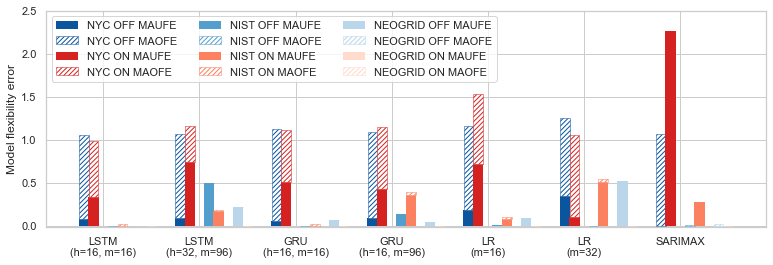

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.close()
sns.set()
sns.set_style("whitegrid")

data_maufe = [
    maufe_error_array[0,:],
    maufe_error_array[1,:],
    maufe_error_array[2,:],
    maufe_error_array[3,:],
    maufe_error_array[4,:],
    maufe_error_array[5,:],
]

data_maofe = [
    maofe_error_array[0,:],
    maofe_error_array[1,:],
    maofe_error_array[2,:],
    maofe_error_array[3,:],
    maofe_error_array[4,:],
    maofe_error_array[5,:],
]

fig, ax = plt.subplots(figsize=(10, 3))
ax = fig.add_axes([0,0,1,1])

# selected_total_width_coef = 1.5
selected_col_width = 0.65

dataset_gap = 0.65
model_gap = 1
epsilon = 0.05

x_multiplier = (((selected_col_width+epsilon)*6 + dataset_gap*2) + model_gap)
X = np.arange(7) * x_multiplier

labels = ['NYC OFF',
          'NYC ON',
          'NIST OFF',
          'NIST ON',
          'NEOGRID OFF',
          'NEOGRID ON']

colors = sns.color_palette()

blues = sns.color_palette('Blues')
reds = sns.color_palette('Reds')

# 0 <= offset <= 5 work
color_offset = 5

for idx in range(6):
   gap_count = idx // 2
   ax.bar(x = (X + (selected_col_width * idx) + dataset_gap*gap_count),
          height = data_maufe[idx],
          width = selected_col_width + epsilon,
          label = f"{labels[idx]} MAUFE",
          color = blues[-idx + color_offset] if idx % 2 == 0 else reds[-idx + color_offset],
          linewidth=0.0,
          # edgecolor=colors[idx],
          )
   ax.bar(x = (X + (selected_col_width * idx) + dataset_gap*gap_count),
          height = data_maofe[idx],
          bottom = data_maufe[idx],
          width = selected_col_width,
          label = f"{labels[idx]} MAOFE",
          color = 'white',
          edgecolor = blues[-idx + color_offset] if idx % 2 == 0 else reds[-idx + color_offset],
          # edgecolor=colors[idx],
          linewidth=0.5,
          hatch='/////',
          )
   # hpv_pos_cna_bar = plt.bar(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
   #                        bottom=pos_mut_pcts,
   #                        alpha=opacity,
   #                        color='white',
   #                        edgecolor='#ED0020',
   #                        linewidth=line_width,
   #                        hatch='//',
   #                        label='HPV+ CNA')

   # ax.barh(y = (X + (selected_col_width * idx) + dataset_gap*gap_count),
   #         width=data[idx])

xticks = [(i * x_multiplier + x_multiplier/5) for i in range(7)]

new_X = [
    "LSTM\n(h=16, m=16)",
    "LSTM\n(h=32, m=96)",
    "GRU\n(h=16, m=16)",
    "GRU\n(h=16, m=96)",
    "LR\n(m=16)",
    "LR\n(m=32)",
    "SARIMAX",
]
for orig, new in zip(mafe_df.index, new_X):
    print(f"{orig} === {new}")


plt.xticks(ticks=xticks,
           labels=new_X,
           rotation=0)

# xticks = [(i * selected_total_width_coef + selected_total_width_coef / 3.) for i in range(4)]

plt.ylim([-0.01, 2.5])

# df_s44_seasoned_no_sarimax.set_index('full_name').index
# custom_legend = [
#     'MAFE NYC OFF',
#     'MAFE NYC ON',
#     'MAFE NIST OFF',
#     'MAFE NIST ON',
#     'MAFE NEOGRID OFF',
#     'MAFE NEOGRID ON',
# ]
# ax.legend(
#     custom_legend
# )

plt.legend(ncol=3)

plt.ylabel('Model flexibility error')

# Save the entire figure (+ axis)
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot

name_postfix = "" if flex_to_output == 0.5 else "_1_0"
output_flex_chart_pdf = f'/Users/jonasb/repos/heat-pump-first-paper/diagram_nbs/output/flex_chart{name_postfix}.pdf'
plt.savefig(output_flex_chart_pdf, bbox_inches = "tight")
plt.show()

LSTM (h=16, m=16) === LSTM
(h=16,
m=16)
LSTM (h=32, m=96) === LSTM
(h=32,
m=96)
GRU (h=16, m=16) === GRU
(h=16,
m=16)
GRU (h=16, m=96) === GRU
(h=16,
m=96)
LR (m=16) === LR
(m=16)
LR (m=32) === LR
(m=32)
SARIMAX === SARIMAX
LSTM (h=16, m=16) === LSTM
(h=16,
m=16)
LSTM (h=32, m=96) === LSTM
(h=32,
m=96)
GRU (h=16, m=16) === GRU
(h=16,
m=16)
GRU (h=16, m=96) === GRU
(h=16,
m=96)
LR (m=16) === LR
(m=16)
LR (m=32) === LR
(m=32)
SARIMAX === SARIMAX
LSTM (h=16, m=16) === LSTM
(h=16,
m=16)
LSTM (h=32, m=96) === LSTM
(h=32,
m=96)
GRU (h=16, m=16) === GRU
(h=16,
m=16)
GRU (h=16, m=96) === GRU
(h=16,
m=96)
LR (m=16) === LR
(m=16)
LR (m=32) === LR
(m=32)
SARIMAX === SARIMAX


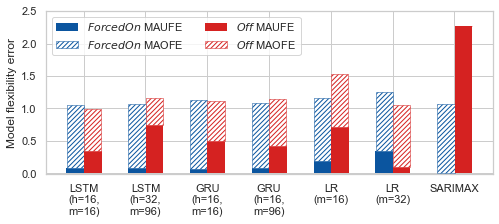

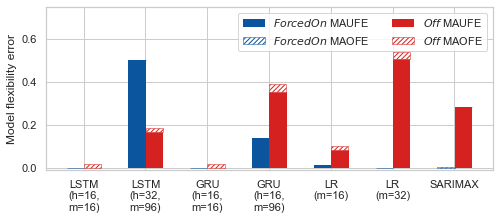

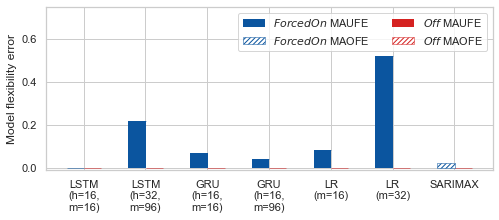

In [48]:
import numpy as np
import matplotlib.pyplot as plt


data_maufe = [
    maufe_error_array[0,:],
    maufe_error_array[1,:],
    maufe_error_array[2,:],
    maufe_error_array[3,:],
    maufe_error_array[4,:],
    maufe_error_array[5,:],
]

data_maofe = [
    maofe_error_array[0,:],
    maofe_error_array[1,:],
    maofe_error_array[2,:],
    maofe_error_array[3,:],
    maofe_error_array[4,:],
    maofe_error_array[5,:],
]


selected_col_width = 0.65

dataset_gap = 0.65
model_gap = 1
epsilon = 0.02

x_multiplier = (((selected_col_width+epsilon)*2) + model_gap)
X = np.arange(7) * x_multiplier

label_on = "$ForcedOn$"
label_off = "$Off$"
mode_labels = [label_on, label_off]

# labels = ['NYC OFF',
#           'NYC ON',
#           'NIST OFF',
#           'NIST ON',
#           'NEOGRID OFF',
#           'NEOGRID ON']

colors = sns.color_palette()
blues = sns.color_palette('Blues')
reds = sns.color_palette('Reds')

# 0 <= offset <= 5 work
color_offset = 5

for dataset_idx in range(3):
    plt.close()
    sns.set()
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(figsize=(8, 3))
    # ax = fig.add_axes([0,0,1,1])
    for idx in range(2):

       data_idx = dataset_idx * 2 + idx
       # gap_count = idx // 2 # Removed gap count (only useful if we want multiple datasets)
       ax.bar(x = (X + (selected_col_width * (idx) + ( idx * (epsilon / 2))  )),
              height = data_maufe[data_idx],
              width = selected_col_width + epsilon,
              label = f"{mode_labels[idx]} MAUFE",
              color = blues[-idx + color_offset] if idx % 2 == 0 else reds[-idx + color_offset],
              linewidth=0.0,
              # edgecolor=colors[idx],
              )
       ax.bar(x = (X + (selected_col_width * idx)),
              height = data_maofe[data_idx],
              bottom = data_maufe[data_idx],
              width = selected_col_width,
              label = f"{mode_labels[idx]} MAOFE",
              color = 'white',
              edgecolor = blues[-idx + color_offset] if idx % 2 == 0 else reds[-idx + color_offset],
              # edgecolor=colors[idx],
              linewidth=0.5,
              hatch='/////',
              )

    # Ticks
    magic_tick_constant = -0.15
    xticks = [(i * x_multiplier + x_multiplier/5 + magic_tick_constant) for i in range(7)]
    new_X = [
         "LSTM\n(h=16,\nm=16)",
         "LSTM\n(h=32,\nm=96)",
         "GRU\n(h=16,\nm=16)",
         "GRU\n(h=16,\nm=96)",
         "LR\n(m=16)",
         "LR\n(m=32)",
         "SARIMAX",
    ]
    for orig, new in zip(mafe_df.index, new_X):
         print(f"{orig} === {new}")
    plt.xticks(ticks=xticks,
                labels=new_X,
                rotation=0)

    if (dataset_idx == 0):
        plt.ylim([-0.01, 2.5])
    else:
        plt.ylim([-0.01, 0.75])
    plt.legend(ncol=2)
    plt.ylabel('Model flexibility error')

    # Save the entire figure (+ axis)
    # https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
    name_postfix = "" if flex_to_output == 0.5 else "_1_0"
    output_flex_chart_pdf = f'/Users/jonasb/repos/heat-pump-first-paper/diagram_nbs/output/flex_chart_{dataset_idx}_{name_postfix}.pdf'
    plt.savefig(output_flex_chart_pdf, bbox_inches = "tight")
    plt.show()


[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


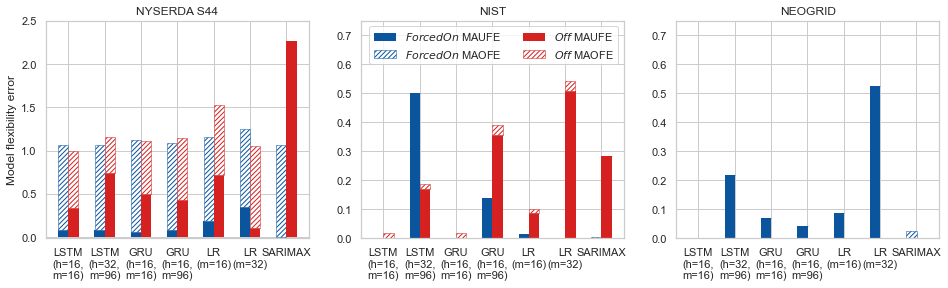

In [49]:
import numpy as np
import matplotlib.pyplot as plt


data_maufe = [
    maufe_error_array[0,:],
    maufe_error_array[1,:],
    maufe_error_array[2,:],
    maufe_error_array[3,:],
    maufe_error_array[4,:],
    maufe_error_array[5,:],
]

data_maofe = [
    maofe_error_array[0,:],
    maofe_error_array[1,:],
    maofe_error_array[2,:],
    maofe_error_array[3,:],
    maofe_error_array[4,:],
    maofe_error_array[5,:],
]


selected_col_width = 0.65

dataset_gap = 0.65
model_gap = 1
epsilon = 0.02

x_multiplier = (((selected_col_width+epsilon)*2) + model_gap)
X = np.arange(7) * x_multiplier

label_on = "$ForcedOn$"
label_off = "$Off$"
mode_labels = [label_on, label_off]

title_labels = ['NYSERDA S44', "NIST", "NEOGRID"]

# labels = ['NYC OFF',
#           'NYC ON',
#           'NIST OFF',
#           'NIST ON',
#           'NEOGRID OFF',
#           'NEOGRID ON']

colors = sns.color_palette()
blues = sns.color_palette('Blues')
reds = sns.color_palette('Reds')

# 0 <= offset <= 5 work
color_offset = 5

plt.close()
sns.set()
sns.set_style("whitegrid")

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
print(axes)

for dataset_idx in range(3):
    # ax = fig.add_axes([0,0,1,1])
    ax = axes[dataset_idx]

    if (dataset_idx == 0):
        ax.set_ylabel('Model flexibility error')
    for idx in range(2):
       data_idx = dataset_idx * 2 + idx
       # gap_count = idx // 2 # Removed gap count (only useful if we want multiple datasets)
       ax.bar(x = (X + (selected_col_width * (idx) + ( idx * (epsilon / 2))  )),
              height = data_maufe[data_idx],
              width = selected_col_width + epsilon,
              label = f"{mode_labels[idx]} MAUFE",
              color = blues[-idx + color_offset] if idx % 2 == 0 else reds[-idx + color_offset],
              linewidth=0.0,
              # edgecolor=colors[idx],
              )
       ax.bar(x = (X + (selected_col_width * idx)),
              height = data_maofe[data_idx],
              bottom = data_maufe[data_idx],
              width = selected_col_width,
              label = f"{mode_labels[idx]} MAOFE",
              color = 'white',
              edgecolor = blues[-idx + color_offset] if idx % 2 == 0 else reds[-idx + color_offset],
              # edgecolor=colors[idx],
              linewidth=0.5,
              hatch='/////',
              )

    # Ticks
    magic_tick_constant = -0.15
    xticks = [(i * x_multiplier + x_multiplier/5 + magic_tick_constant) for i in range(7)]
    new_X = [
         "LSTM\n(h=16,\nm=16)",
         "LSTM\n(h=32,\nm=96)",
         "GRU\n(h=16,\nm=16)",
         "GRU\n(h=16,\nm=96)",
         "LR\n(m=16)",
         "LR\n(m=32)",
         "SARIMAX",
    ]

    # FOR DEBUGGING:
    # for orig, new in zip(mafe_df.index, new_X):
    #      print(f"{orig} === {new}")

    # Adding xticks for every subplot
    ax.set_xticks(xticks)
    ax.set_xticklabels(new_X, rotation=00)

    # Using different y axis limits for S44
    if (dataset_idx == 0 and flex_to_output == 0.5):
        ax.set_ylim(bottom = -0.01, top=2.5)
    else:
        ax.set_ylim(bottom = 0.0, top=0.75)

    # Adding dataset name on top of every subplot
    ax.set_title(title_labels[dataset_idx])

    # Adding legend only to the second plot
    if (dataset_idx == 1):
        ax.legend(ncol=2)

# Save the entire figure (+ axis)
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
name_postfix = "" if flex_to_output == 0.5 else "_1_0"
output_flex_chart_pdf = f'/Users/jonasb/repos/heat-pump-first-paper/diagram_nbs/output/flex_chart_subplot{name_postfix}.pdf'
plt.savefig(output_flex_chart_pdf, bbox_inches = "tight")
plt.show()
